In [1]:
library(BiSeq)
library(aods3)
library(limma)

# load RRBS data 
load('rrbsData.RData') 
rrbs

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

class: BSraw 
dim: 963 4 
metadata(0):
assays(2): totalReads methReads
rownames: NULL
rowData names(0):
colnames(4): sample1 sample2 sample3 sample4
colData names(1): group

In [2]:
colData(rrbs)

DataFrame with 4 rows and 1 column
              group
        <character>
sample1   treatment
sample2   treatment
sample3     control
sample4     control

In [3]:
head(totalReads(rrbs))


sample1,sample2,sample3,sample4
17,333,18,395
17,329,16,379
39,83,83,41
68,111,23,37
68,111,23,37
68,111,22,37


In [4]:
head(methReads(rrbs))


sample1,sample2,sample3,sample4
10,268,16,341
12,249,14,284
38,78,83,40
42,97,18,33
52,104,14,27
59,109,18,29


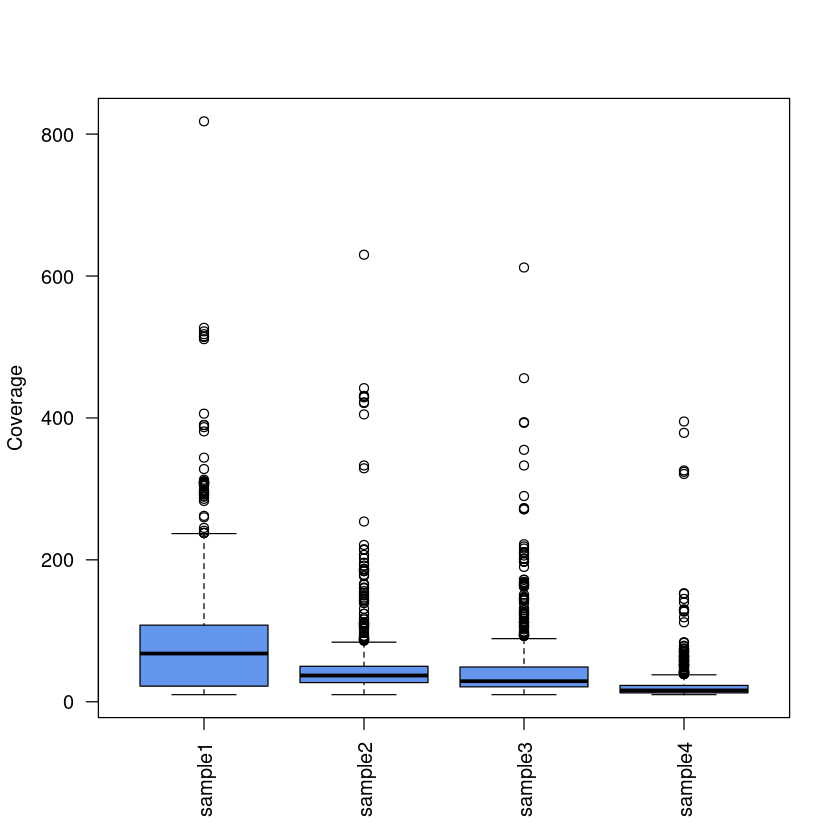

In [5]:
covBoxplots(rrbs,col = "cornflowerblue", las = 2)

In [2]:
# filter data to include only loci that have minimum 11x coverage in all samples
total_reads <- totalReads(rrbs)
coverage_filter <- total_reads >= 11 
rrbs2 <- rrbs[rowSums(coverage_filter) == ncol(total_reads), ]
rrbs2

class: BSraw 
dim: 854 4 
metadata(0):
assays(2): totalReads methReads
rownames: NULL
rowData names(0):
colnames(4): sample1 sample2 sample3 sample4
colData names(1): group

2. Compute the estimated methylation fraction for each locus and for each sample. Plot a histogram of the methylation fractions for each sample.
Comment on the distribution.

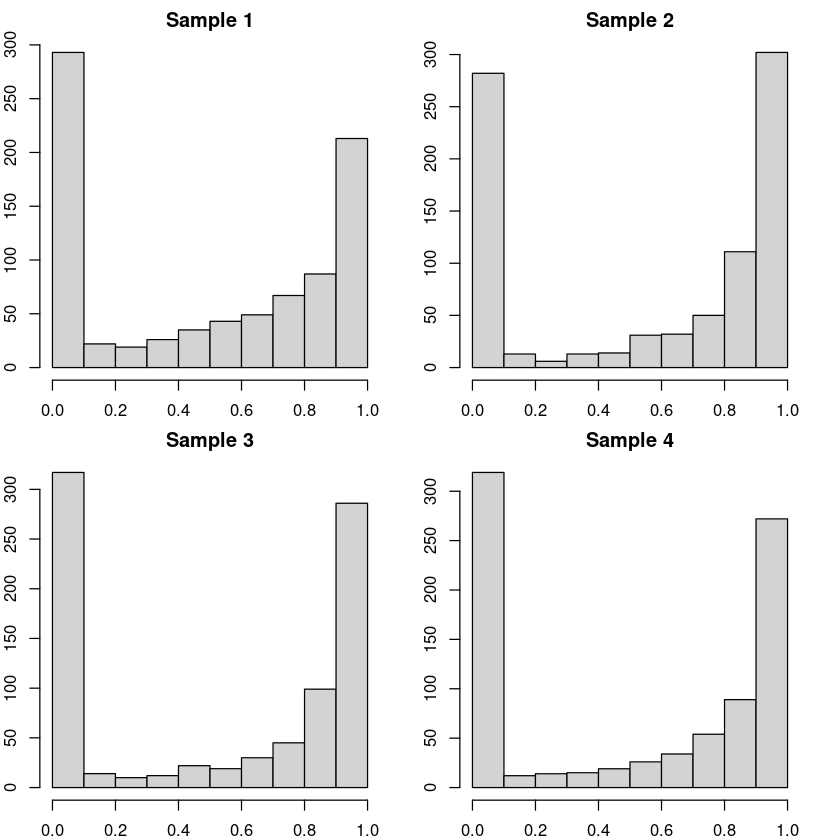

In [3]:
# Compute the estimated methylation fraction for each locus and for each sample
meth_reads <- methReads(rrbs2)
total_reads <- totalReads(rrbs2)
meth_fraction <- meth_reads / total_reads


# generate a histogram plot of the methylation fractions 
#(one histogram plot for each sample).
#Hints par(mar=c(2,2,2,2)) par(mfrow=c(2,2)), hist(), pdf("meth-fractions.pdf")... dev.off()
#XXX
#pdf("meth-fractions.pdf")
par(mar = c(2, 2, 2, 2))
par(mfrow = c(2, 2))
for (i in 1:ncol(meth_fraction)) {
  hist(meth_fraction[, i], main = paste("Sample", i), xlab = "Methylation Fraction")
}
#dev.off()


In [4]:
meth_fraction

sample1,sample2,sample3,sample4
0.58823529,0.8048048,0.8888889,0.8632911
0.70588235,0.7568389,0.8750000,0.7493404
0.97435897,0.9397590,1.0000000,0.9756098
0.61764706,0.8738739,0.7826087,0.8918919
0.76470588,0.9369369,0.6086957,0.7297297
0.86764706,0.9819820,0.8181818,0.7837838
0.82352941,0.7946429,0.6956522,0.6470588
0.08955224,0.1250000,0.0000000,0.0000000
0.92647059,0.8518519,0.9565217,0.8529412
0.80952381,0.9666667,1.0000000,0.9230769


3. Compute the M-values for each locus and sample. M-value is calculated
as
M = logit 
ymeth + 1
ytotal + 2
, (1)
where ymeth is the number of methylated reads and ytotal is the number
of total reads. The above transformation adds pseudocounts to the read
counts to avoid exact zeros and ones which would result to ±∞ in the logit
transformation: +1 is added to both methylated and unmethylated reads
(+2 added to total reads). Plot a histogram of M-values for each sample.
Comment on the distribution (tasks 1, 2 and 3, 0.5 point altogether).


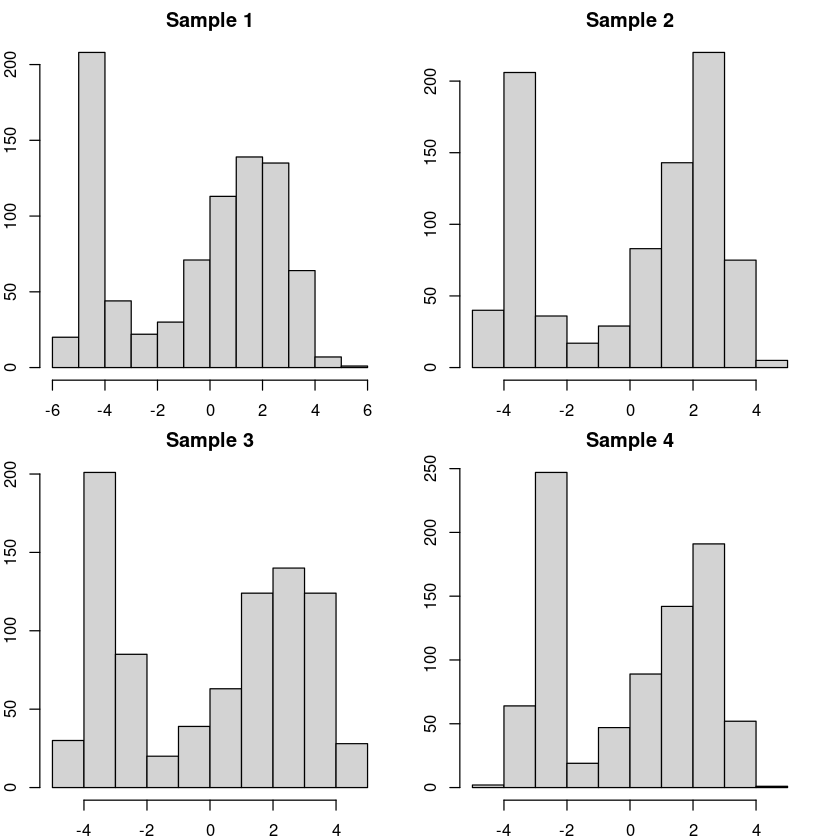

In [5]:
#generate a histogram plot of the M-values
#XXX

logit <- function(p) {
  log(p / (1 - p))
}
 
# Calculate M-values
adjusted_meth_reads <- meth_reads + 1
adjusted_total_reads <- total_reads + 2

# Compute M-values
m_values <- logit(((meth_reads +1) / (total_reads +2)))


#pdf("m-values.pdf")
par(mar = c(2, 2, 2, 2))
par(mfrow = c(2, 2))
for (i in 1:ncol(m_values)) {
  hist(m_values[, i], main = paste("Sample", i), xlab = "M-value")
}
#dev.off()


In [6]:
head(m_values)

sample1,sample2,sample3,sample4
0.3184537,1.405057,1.7346011,1.8274776
0.7731899,1.127012,1.6094379,1.0881410
2.9704145,2.577688,4.4308168,3.0204249
0.4653632,1.876917,1.1526795,1.9169226
1.1370786,2.574519,0.4054651,0.9343092
1.7917595,3.601868,1.3350011,1.2039728


4. Assume that the M-values can be approximated by a normal distribution and identify the differentially methylated loci (DML) between treatment and control groups using limma. limma implements the so-called
moderated t-test that shares information between genes for more robust
variance estimation. Use the information in the colData object to construct the design matrix, and check that the design matrix includes the
intercept term. Adjust p-values for multiple testing using BenjaminiHochberg procedure and count the number of loci with FDR < 0.05 (2
points). (Useful functions: lmFit, eBayes).

In [7]:
# assume the distribution of the methylation fractions can be approximated 
#by a normal distribution and identify candidate differentially methylated 
#loci (DML) using the limma package for linear models. 
#Fit a linear model and perform moderated t-test. (functions: lmFit, eBayes).  
#Construt design matrix with the intercept term
group <- factor(colData(rrbs2)$group)  
d <- model.matrix(~ group)
fit <- lmFit(m_values, d)
eb <- eBayes(fit)


# adjust p-values for multiple testing using Benjamini-Hochberg method 
#and determine the number of loci with adjusted p-value < 0.05
fdr1 <- p.adjust(eb$p.value[, "grouptreatment"], method = "BH")

dml_count <- sum(fdr1 < 0.05)
dml_count

[1] 45

In [8]:
d

,(Intercept),grouptreatment
1,1,1
2,1,1
3,1,0
4,1,0


5. Analyze the data using beta-binomial model. For this task you will use the aodml function from the aods3 package. Add pseudocounts
to the methylated and total number of reads before learning the model. (Note that adding pseudocounts is not necessary for this model in general
but numerical optimization can occasionally fail without these counts, if ymeth = 0 or ymeth = ytotal for all samples.) Learn 1) the full model and 2)
the reduced model without the test factor. Note that the required data
 input to aodml function is a data frame. Check the template code for
further help with the function (2 points).


In [9]:
nrow(rrbs2)

[1] 854

In [10]:
# Identify candidate DML using a beta-binomial model. 
# The data input to aodml() is a data frame structure 
#https://stat.ethz.ch/R-manual/R-devel/library/base/html/data.frame.html
pvals<-c()
# For each locus i...
for (i in 1:nrow(rrbs2)) {
  n <- totalReads(rrbs2)[i, ] +1 # Get the total cytosine coverage
  #cat("n: ", n)
  m <- methReads(rrbs2)[i, ] +1 # Get the methylated cytosine count
  #cat("m: ", m)

  # Create the data frame containing the variables n and m
  df <- data.frame(n, m)
  # Add the data in the design matrix to the data frame
  df$case[rrbs2$group=='control']<-0
  df$case[rrbs2$group=='treatment']<-1

  # Learn the full model
  fm <- aodml(cbind(m, n - m) ~ . , data = df, family = "bb",
              link='logit',phi.scale='log',method='BFGS')  
  
  # Learn the reduced model, replace "~ ." by "~ 1", 
  #and use method='Nelder-Mead' instead of method='BFGS'.
  rm <- aodml(cbind(m, n - m) ~ 1, data = df, family = "bb", link = 'logit', phi.scale = 'log', method = 'Nelder-Mead') # <- test without the covariate "treatment group"

  # Calculate the log-likelihood ratio and compute the p-value 
  #based on the chi-squared test. Use lower.tail=F. 
  llr <- -2 * (rm$logL - fm$logL) 
  pvals[i] <- pchisq(llr, df = 1, lower.tail = FALSE)
}


Warning message in aodml(cbind(m, n - m) ~ ., data = df, family = "bb", link = "logit", :
“The hessian matrix was singular.
”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbeta(a + m, b + n - m):
“NaNs produced”
Warning message in lbeta(a, b):
“NaNs produced”
Warning message in lbe

6. Compare the full and reduced models by computing the log-likelihood
ratios and test for significance using the chi-squared test. Correct the
p-values for multiple testing and count the loci with FDR< 0.05 (0.25
point).

In [11]:
# Correct p-values for multiple testing using BH method
fdr2 <- p.adjust(pvals, method = "BH")

dml_count2 <- sum(fdr2 < 0.05) # rehet H0: "mean of methylation is the same batween groups"
dml_count2

[1] 22

7. Compare the DML obtained with limma and aodml. How many DML
do you get from each method? How many DML are unique to each
method? Comment on the possible sources of differences between the
two methods (0.25 point).

In [45]:
# Compare the lists of candidate DML (adjusted p-value < 0.05) 
#obtained with limma and aodml. 
# 1) How many DML do you get from each method?
dml_limma <- which(fdr1 < 0.05)
dml_aodml <- which(fdr2 < 0.05)

count_limma <- length(dml_limma)
count_aodml <- length(dml_aodml)

# 2) How many DML are unique to each method? 
unique_limma <- dml_limma[!dml_limma %in% dml_aodml]
unique_aodml <- dml_aodml[!dml_aodml %in% dml_limma]

count_unique_limma <- length(unique_limma)
count_unique_aodml <- length(unique_aodml)

cat("DMLs identified by Limma:", count_limma, "\n")
cat("DMLs identified by aodml:", count_aodml, "\n")
cat("Unique DMLs to Limma:", count_unique_limma, "\n")
cat("Unique DMLs to aodml:", count_unique_aodml, "\n")
# 3) Comment in the report on the possible sources of 
#differences between the two results.

DMLs identified by Limma: 45 
DMLs identified by aodml: 22 
Unique DMLs to Limma: 32 
Unique DMLs to aodml: 9 


In [46]:
dml_limma

[1]  23  24  33  34  49  54  73 169 176 238 245 269 272 273 278 279 280 292 295
[20] 300 303 312 328 537 637 642 648 649 746 793 805 806 807 808 809 810 811 812
[39] 813 814 815 816 819 825 833

In [47]:
dml_aodml

[1]  33  40  42  54 131 140 176 228 237 238 269 278 297 299 300 312 315 537 642
[20] 648 815 825